# Co 01 Timepoint Prediction with Missing Data (10fold reads)
For Figures S11 and S12

Instead of 59, 588, etc. # reads do 10, 100, 1000, etc.

## Import Modules

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import random

from turtles.turtles_utils import *

## Set Filepaths

In [3]:
#: Overall directory for TdT project data and analysis
tdt_dir = '/mnt/c/Users/jonst/Box Sync/All_dNTP_data/'

#: Subdirectory for NGS run
data_dir = tdt_dir + 'Data_and_Results/All_Data_Filtered_Trimmed/Co_01_paired_simple_cut/'

#: Filename prefixes for 0 control conditions
zero_control_conds = ['Namita_23630_Mg_Col_T0_1-167005853',
                      'Namita_23630_Mg_Col_T0_2-166999859',
                      'Namita_23630_Mg_Col_T0_3-167009845']

#: Filename prefixes for 1 control conditions
one_control_conds = ['Namita_23630_Cobalt_Col_T0_1-167010847',
                     'Namita_23630_Cobalt_Col_T0_2-166993853',
                     'Namita_23630_Cobalt_Col_T0_3-166999858']

#: suffix of R1 fastq file to read in each directory
filename_end = 'trimmed.fq'

#: Directory to save generated figures in - it gets created if not present already
figure_dir = tdt_dir + 'Data_and_Results/Cobalt_01/Co_01_Paired_Simple_Cut_Final_nobasecut/'
os.makedirs(os.path.dirname(figure_dir), exist_ok=True)

n_reads = [10, 100, 1000, 10000, 100000]
n_trials = [100, 100, 100, 50, 10]

## Load Sequences

In [4]:
seqs_dict = read_seqs(data_dir, filename_end=filename_end, cutoff=0)

Loading Namita_23630_Cobalt_Col_10_min_1-166999856
Read 543724 sequences...

Loading Namita_23630_Cobalt_Col_10_min_2-167010846
Read 713786 sequences...

Loading Namita_23630_Cobalt_Col_10_min_3-167008844
Read 781199 sequences...

Loading Namita_23630_Cobalt_Col_20_min_1-167006850
Read 634854 sequences...

Loading Namita_23630_Cobalt_Col_20_min_2-166996865
Read 618589 sequences...

Loading Namita_23630_Cobalt_Col_20_min_3-166999857
Read 623927 sequences...

Loading Namita_23630_Cobalt_Col_45_min_1-166996866
Read 620758 sequences...

Loading Namita_23630_Cobalt_Col_45_min_2-167009844
Read 578837 sequences...

Loading Namita_23630_Cobalt_Col_45_min_3-166992854
Read 556232 sequences...

Loading Namita_23630_Cobalt_Col_T0_1-167010847
Read 632005 sequences...

Loading Namita_23630_Cobalt_Col_T0_2-166993853
Read 517898 sequences...

Loading Namita_23630_Cobalt_Col_T0_3-166999858
Read 613767 sequences...

Loading Namita_23630_Mg_Col_T0_1-167005853
Read 611651 sequences...

Loading Namita_2363

## Randomly Remove Sequences n Times for each Percent Data Removed

In [5]:
seqs_dict_rm = {}

for n_read, n_trial in zip(n_reads, n_trials):
    print(n_read)
    seqs_dict_rm[n_read] = {}

    for n in range(n_trial):
        
        seqs_dict_rm[n_read][n + 1] = {}

        for cond in seqs_dict:
            if cond != 'Namita_23630_NoTdT_Col-166993854':
                seqs_left = random.sample(seqs_dict[cond], n_read)
                seqs_dict_rm[n_read][n + 1][cond] = seqs_left

10
100
1000
10000
100000


## Choose Legend Labels for Plotting
### Condition Labels

In [6]:
condition_dict = {}
conditions = seqs_dict.keys()
for condition in conditions:
    cond = condition[:10]
    if 'Cobalt_Col_T0' in condition:
        condition_dict[condition] = '1 Control'
    elif 'Cobalt_Col_10_min' in condition:
        condition_dict[condition] = '01 at 10 min'
    elif 'Cobalt_Col_20_min' in condition:
        condition_dict[condition] = '01 at 20 min'
    elif 'Cobalt_Col_45_min' in condition:
        condition_dict[condition] = '01 at 45 min'
    elif 'Mg_Col_T0' in condition:
        condition_dict[condition] = '0 Control'
    elif 'NoTdT' in condition:
        condition_dict[condition] = 'No TdT Control'
    else:
        print(condition, 'not recognized.')

### Replicate Labels

In [7]:
rep_dict = {}
for condition in conditions:
    if 'NoTdT' in condition:
        rep_dict[condition] = 1
    else:
        rep_dict[condition] = condition[-11]

## Bin Sequences, Calculate dNTP Frequency, and Transform into Aitchison Space
Note: Binning can take a while.

In [8]:
counts_dict = {}

for n_read, n_trial in zip(n_reads, n_trials):
    print(n_read)
    
    counts_dict[n_read] = {}
    
    for n in range(n_trial):

        counts_dict[n_read][n + 1] = get_norm_len_base_counts(seqs_dict_rm[n_read][n + 1], num_bins=1000)

10
Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-16699

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobal

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-1

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_236

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-16699

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_236

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_C

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_236

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobal

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobal

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_236

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_236

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_236

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_236

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_236

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_236

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-16699

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobal

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_236

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-1

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_C

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_236

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_236

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10

In [9]:
pcts_dict = {n_read: {} for n_read in n_reads}
clr_data = {n_read: {} for n_read in n_reads}

for n_read, n_trial in zip(n_reads, n_trials):

    for n in range(n_trial):

        counts = counts_dict[n_read][n + 1]
        pcts = calc_norm_len_base_pcts(counts)
        clr_vals = calc_aitchison_distance(pcts)
        
        pcts_dict[n_read][n + 1] = pcts
        clr_data[n_read][n + 1] = clr_vals

/home/jonstrutz/All_dNTP_Data/turtles/turtles_utils.py:657: RuntimeWarning: divide by zero encountered in log
  lmat = np.log(mat)
/home/jonstrutz/All_dNTP_Data/turtles/turtles_utils.py:660: RuntimeWarning: invalid value encountered in subtract
  return (lmat - gm).squeeze()


## Calculate and Plot Timepoint Results
### Convert Data into Long-Form pandas DataFrame

In [10]:
counts_dict[10][1]

{'Namita_23630_Cobalt_Col_10_min_1-166999856': {'A': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3.,
         2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 3., 3., 3.,
         3., 3., 3., 3., 3., 3., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4.,
         4., 4., 5., 5., 6., 6., 6., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
         7., 7., 7., 6., 6., 6., 4., 4., 4., 4., 5., 5., 5., 5., 5., 5., 5.,
         6., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 4., 4., 4.,
         4., 2., 2., 2., 3., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
         3., 3., 3., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
         2., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
         4., 4., 5., 6., 

In [11]:
data_dfs = {n_read: {} for n_read in n_reads}

num_bins = 1000

for n_read, n_trial in zip(n_reads, n_trials):
    print(n_read)
    
    for n in range(n_trial):
        print(n)
        data_df = generate_aitch_df(pcts_dict[n_read][n + 1], clr_data[n_read][n + 1],
                                    condition_dict, rep_dict, zero_control_conds,
                                    one_control_conds)

        data_df = calc_signal(data_df, zero_control_conds, one_control_conds)
        
        for directory in data_df.Directory.unique():
            if n_read == 10:
                window = 200
            elif n_read == 100:
                window = 200
            elif n_read == 1000:
                window = 1
            elif n_read == 10000:
                window = 1
            elif n_read == 100000:
                window = 1
                
            data_df.loc[data_df.Directory == directory, 'Signal'] = \
                data_df.loc[data_df.Directory == directory, 'Signal'].rolling(window=window, min_periods=1).mean()
            
        data_df['Trial'] = [n + 1] * len(data_df)
        data_df['Num Trials'] = [n_trial] * len(data_df)
        
        num_seqs_col = []
        
        for condition in data_df.Directory.unique():
            
            num_seqs = len(seqs_dict_rm[n_read][n + 1][condition])
            num_seqs_col += [num_seqs] * num_bins

        data_df['Num Seqs'] = num_seqs_col
        
        data_dfs[n_read][n + 1] = data_df

10
0


/home/jonstrutz/All_dNTP_Data/turtles/turtles_utils.py:749: RuntimeWarning: invalid value encountered in subtract
  diffs0 = [abs(clr_data[directory][base] - zero_cond_clr_means[base])
/home/jonstrutz/All_dNTP_Data/turtles/turtles_utils.py:751: RuntimeWarning: invalid value encountered in subtract
  diffs1 = [abs(clr_data[directory][base] - one_cond_clr_means[base])


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
1000
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
10000
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
4

### Calculate Switch Times

In [15]:
averages_dict = {n_read: {} for n_read in n_reads}
len_dists_dict = {n_read: {} for n_read in n_reads}

for n_read, n_trial in zip(n_reads, n_trials):
    
    for n in range(n_trial):
        
        len_dists = get_length_dists(seqs_dict_rm[n_read][n + 1])

        averages = parse_fastq_lengths(len_dists, expt_time=60)
        averages = calc_switch_bins(averages, data_dfs[n_read][n + 1])
        averages = calc_switch_times(averages, num_bins=1000,
                                     start_control_conds=zero_control_conds,
                                     end_control_conds=one_control_conds, t_expt=60)
        
        len_dists_dict[n_read][n + 1] = len_dists
        averages_dict[n_read][n + 1] = averages

In [16]:
averages_dict[100000][1]

,Directory,Mean,Std Devs,Rate (nt/min),Switch Bin,Switch Time
0,Namita_23630_Cobalt_Col_10_min_1-166999856,20.59668,9.894158,0.343278,130.588287,8.511102
1,Namita_23630_Cobalt_Col_10_min_2-167010846,21.11070,9.894847,0.351845,120.757902,7.878089
2,Namita_23630_Cobalt_Col_10_min_3-167008844,21.20948,10.152624,0.353491,136.887926,8.916109
3,Namita_23630_Cobalt_Col_20_min_1-167006850,20.45876,10.272170,0.340979,289.805594,18.594397
4,Namita_23630_Cobalt_Col_20_min_2-166996865,21.41861,10.354097,0.356977,264.145171,16.990563
5,Namita_23630_Cobalt_Col_20_min_3-166999857,18.97513,9.793353,0.316252,267.913310,17.226585
6,Namita_23630_Cobalt_Col_45_min_1-166996866,19.80224,9.976565,0.330037,581.147176,36.255741
7,Namita_23630_Cobalt_Col_45_min_2-167009844,18.24064,9.659274,0.304011,600.567556,37.398340
8,Namita_23630_Cobalt_Col_45_min_3-166992854,19.31958,9.979927,0.321993,579.608423,36.165028
9,Namita_23630_Cobalt_Col_T0_1-167010847,21.26042,10.296902,0.354340,NaN,NaN


In [17]:
averages_dict[10][1]

,Directory,Mean,Std Devs,Rate (nt/min),Switch Bin,Switch Time
0,Namita_23630_Cobalt_Col_10_min_1-166999856,28.6,17.298555,0.476667,352.143708,20.751901
1,Namita_23630_Cobalt_Col_10_min_2-167010846,19.3,6.181424,0.321667,NaN,NaN
2,Namita_23630_Cobalt_Col_10_min_3-167008844,27.8,12.237647,0.463333,345.992535,20.385960
3,Namita_23630_Cobalt_Col_20_min_1-167006850,21.0,16.583124,0.350000,352.363937,20.765005
4,Namita_23630_Cobalt_Col_20_min_2-166996865,20.0,8.854377,0.333333,325.915444,19.192410
5,Namita_23630_Cobalt_Col_20_min_3-166999857,21.1,11.776672,0.351667,NaN,NaN
6,Namita_23630_Cobalt_Col_45_min_1-166996866,13.6,4.862098,0.226667,NaN,NaN
7,Namita_23630_Cobalt_Col_45_min_2-167009844,17.3,9.011659,0.288333,NaN,NaN
8,Namita_23630_Cobalt_Col_45_min_3-166992854,16.1,6.007495,0.268333,NaN,NaN
9,Namita_23630_Cobalt_Col_T0_1-167010847,17.2,11.565466,0.286667,NaN,NaN


### Calculate average switch time and error for each p_discard

In [18]:
switch_time_col = []
actual_time_col = []
trial_col = []
n_read_col = []
num_seqs_col = []


means10 = {n_read: [] for n_read in n_reads}
means20 = {n_read: [] for n_read in n_reads}
means45 = {n_read: [] for n_read in n_reads}

for n_read, n_trial in zip(n_reads, n_trials):
    
    for n in range(n_trial):

        averages = averages_dict[n_read][n + 1]

        means10[n_read] += [averages['Switch Time'][0:3].mean()]
        means20[n_read] += [averages['Switch Time'][3:6].mean()]
        means45[n_read] += [averages['Switch Time'][6:9].mean()]

    switch_time_col += means10[n_read]
    actual_time_col += [10] * n_trial

    switch_time_col += means20[n_read]
    actual_time_col += [20] * n_trial

    switch_time_col += means45[n_read]
    actual_time_col += [45] * n_trial
    
    trial_col += [n + 1 for n in list(range(n_trial)) * 3]  # 3 conditions
    n_read_col += [n_read] * n_trial * 3  # 3 conditions

In [19]:
summary_df = pd.DataFrame()

summary_df['Trial'] = trial_col
summary_df['Actual Time'] = actual_time_col
summary_df['Predicted Time'] = switch_time_col
summary_df['# of Reads'] = n_read_col

jitter = [random.uniform(.8, 1.25) for _ in range(len(summary_df))]
summary_df['# of Reads (Jitter)'] = summary_df['# of Reads'] * jitter

summary_df['Percent Error'] = abs(summary_df['Actual Time'] - summary_df['Predicted Time']) \
                              / summary_df['Actual Time'] * 100

summary_df.head()

,Trial,Actual Time,Predicted Time,# of Reads,# of Reads (Jitter),Percent Error
0,1,10,20.568930,10,9.451854,105.689304
1,2,10,28.683126,10,10.674264,186.831265
2,3,10,30.998509,10,8.277652,209.985091
3,4,10,NaN,10,10.613802,NaN
4,5,10,11.422110,10,11.322207,14.221098


In [20]:
summary_df.tail()

,Trial,Actual Time,Predicted Time,# of Reads,# of Reads (Jitter),Percent Error
1075,6,45,36.709409,100000,86061.821758,18.423535
1076,7,45,35.889419,100000,119899.488137,20.245736
1077,8,45,36.693090,100000,99926.010106,18.459801
1078,9,45,36.940782,100000,97086.744601,17.909374
1079,10,45,36.663715,100000,114227.649159,18.525077


### Set Seaborn Style

In [21]:
sns.set(style='white', font='times-new-roman', font_scale=2, rc={'lines.linewidth': 5})
mpl.rc('font',family='Times New Roman')

In [22]:
colors = [(128/255, 199/255, 224/255),  # 10 min
          (41/255, 171/255, 226/255),   # 20 min
          (0/255, 113/255, 188/255),    # 45 min
          (241/255, 90/255, 36/255),    # 1 control
          (119/255, 178/255, 150/255)]  # 0 control
sns.set_palette(sns.color_palette(colors))

### Plot

In [26]:
summary_df.loc[summary_df['# of Reads'] == 100000].groupby('Actual Time').mean()

,Trial,Predicted Time,# of Reads,# of Reads (Jitter),Percent Error
Actual Time,,,,,
10,5.5,8.563526,100000.0,96208.054538,14.364744
20,5.5,17.482392,100000.0,104092.906656,12.588040
45,5.5,36.557825,100000.0,106090.505292,18.760388


<ipython-input-27-4860900247c9>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '0', '10', '100', '1,000', '10,000', '100,000'])


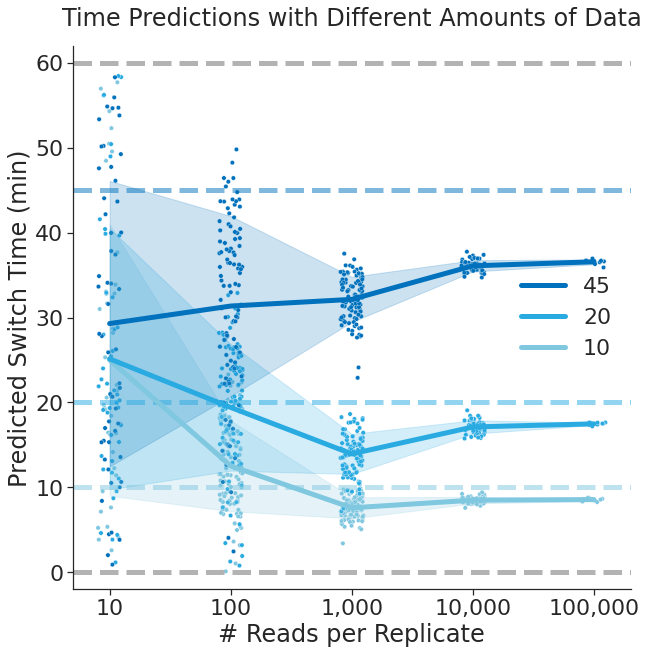

In [27]:
fig, ax = plt.subplots(figsize=(10,10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax.axhline(0, color='.7', ls='--')
ax.axhline(60, color='.7', ls='--')

ax.axhline(10, color=sns.color_palette()[0], alpha=.5, ls='--')
ax.axhline(20, color=sns.color_palette()[1], alpha=.5, ls='--')
ax.axhline(45, color=sns.color_palette()[2], alpha=.5, ls='--')

ax = sns.scatterplot(x='# of Reads (Jitter)', y='Predicted Time', hue='Actual Time',
                     data=summary_df, s=20, legend=False,
                     palette=sns.color_palette()[0:3])

ax = sns.lineplot(x='# of Reads', y='Predicted Time', hue='Actual Time', ci="sd",
                  data=summary_df, legend='full', palette=sns.color_palette()[0:3])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], frameon=False)

ax.set_ylim(-2, 62)

ax.set(xscale='log')

ax.set_xlabel('# Reads per Replicate')
ax.set_xticklabels(['0', '0', '10', '100', '1,000', '10,000', '100,000'])
ax.set_ylabel('Predicted Switch Time (min)')
ax.set_title('Time Predictions with Different Amounts of Data', pad=20)

fig.savefig(figure_dir + 'Time_Prediction_MA')
fig.savefig(figure_dir + 'Time_Prediction_MA.svg')

<ipython-input-28-f975927bd6fc>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '0', '10', '100', '1,000', '10,000', '100,000'])


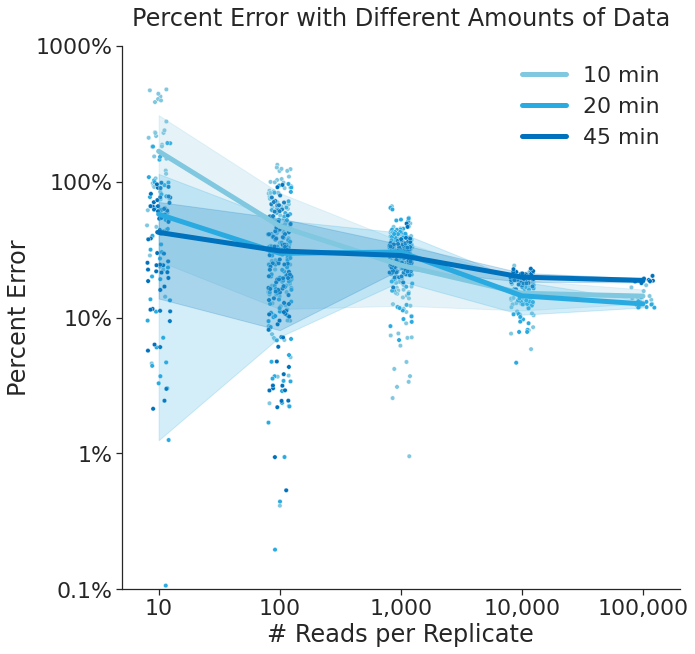

In [28]:
fig, ax = plt.subplots(figsize=(10,10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax = sns.scatterplot(x='# of Reads (Jitter)', y='Percent Error', hue='Actual Time',
                     data=summary_df, s=20, legend=False,
                     palette=sns.color_palette()[0:3])

ax = sns.lineplot(x='# of Reads', y='Percent Error', hue='Actual Time', ci='sd',
                  data=summary_df, legend='full', palette=sns.color_palette()[0:3])

ax.legend(['10 min', '20 min', '45 min'], frameon=False)

ax.set(xscale='log', yscale='log')

ax.set_ylim(0.1, 1000)

ax.set_xlabel('# Reads per Replicate')
ax.set_xticklabels(['0', '0', '10', '100', '1,000', '10,000', '100,000'])
ax.set_ylabel('Percent Error')
ax.set_yticks([0.1, 1, 10, 100, 1000])
ax.set_yticklabels([f'{10 ** pct}%' for pct in range(-1, 4)])

ax.set_title('Percent Error with Different Amounts of Data', pad=20)
fig.savefig(figure_dir + 'Percent_Error')
fig.savefig(figure_dir + 'Percent_Error.svg')

## Plot Examples with Missing Data
Just use 1st trial of each p_discard

In [ ]:
print(data_dfs[10][1])

In [ ]:
n_bins = 1000

n_reads = [10, 100, 1000, 10000, 100000]

for n_read in n_reads:
    sub_data = data_dfs[n_read][1]
    sub_data = sub_data[sub_data.Condition != 'No TdT Control']
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

    sns.lineplot(x='Bin Number', y='Signal', hue='Condition',
                 data=sub_data, ax=ax)

    ax.legend(loc=(1.04, 0.4), fontsize=20, frameon=False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(labelleft=True, left=True, bottom=True)

    ax.set_xlim(0, n_bins)
    ax.set_xticks(range(0, n_bins + 1, int(n_bins / 5)))
    ax.set_xticklabels(np.arange(0, 1.1, 0.2, dtype=np.float32))
    ax.set_xlabel('Normalized Position', fontsize=32)
    ax.set_ylabel('Signal', fontsize=32)
    ax.set_ylim(-0.1, 1.1)
    ax.set_title(r'$0 \rightarrow 1$' + f' with {n_read} reads per replicate',
                 fontsize=32, pad=20)

    # Add switch bases
    averages = averages_dict[n_read][1]
    ax.axvline(averages.iloc[0:3, 4].mean(), color=sns.color_palette()[0], alpha=.7, ls='--')
    ax.axvline(averages.iloc[3:6, 4].mean(), color=sns.color_palette()[1], alpha=.7, ls='--')
    ax.axvline(averages.iloc[6:9, 4].mean(), color=sns.color_palette()[2], alpha=.7, ls='--')

    ax.axhline(0.5, color='0.5', alpha=0.7, ls='--')

    plt.tight_layout()
    fig.savefig(figure_dir + '01_Timepoint_' + str(n_read) + '_Trial1_removed.png')
    plt.show()